### Overview


    Proyek ini adalah proyek Titanic. 
    Dalam proyek ini, saya menganalisis data dari orang-orang yang selamat dari tenggelamnya kapal Titanic. 
    Proyek ini cukup sederhana, hanya membuat model yang dapat memprediksi apakah seorang penumpang 
    memiliki peluang untuk bertahan hidup atau tidak berdasarkan variabel tertentu.

#### Random Forest Clasification

 Keuntungan penggunaan random forest yaitu mampu mengklasifiksi data yang memiliki atribut yang tidak lengkap,dapat digunakan untuk klasifikasi dan regresi akan tetapi tidak terlalu bagus untuk regresi, lebih cocok untuk pengklasifikasian data serta dapat digunakan untuk menangani data sampel yang banyak

### Seaborn

#### Seaborn
    library pada Python untuk visualisasi data. Libary ini sangat berguna ketika Anda bekerja untuk memahami suatu data yang sederhana maupun kompleks.

### Goals
    Diharapkan Dapat melakukan analisis data dan buat model Machine Learning untuk memprediksi jumlah yang selamat.

### Result
        Akurasi model yang dibuat adalah 0,83. Model tersebut diterapkan dan dibuat prediksi yang ternyata 61,48% penumpang tidak selamat dan 38,52% penumpang selamat.

### Data Profiling

1. PassengerId 
2. Survived is target to be predict, value 0 = not survived and 1 = survived
3. Pclass(Passenger Class) is a category of the socioeconomic level of passenger with a value(1, 2, 3): 1 = Upper Class, 2 = Middle class, 3 = Lower Class
4. Name, Sex and Age 
5. SibSp adalah jumlah kerabat penumpang
6. Parch adalah jumlah orang tua dan anak
7. Ticket is number of passenger tickets
8. Fare adalah tarif yang dikenakan kepada penumpang
9. Cabin is the passenger cabin number
10. Embarked is port of departure there are 3 ports(C, Q or S) C = Cherbourg, Q = queenstown, S = Southampton
    

### Import Data set dan Concat Data Frame

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [162]:
## Membuat Function 'concat_df' untuk mengabungkan dataframe
def concat_df(train_data, test_data):
    # Return a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [163]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)


In [164]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

In [165]:
dfs

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

### Profiling
    Dataset dibagi menjadi train set dengan jumlah sampel 891 dan test set dengan total 418. 
    Gambar tabel dapat dilihat di bawah ini:

In [166]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [167]:
df_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

In [168]:
df_test.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)

In [169]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [170]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


    Perbedaan antara df_train dan df_test adalah bahwa di df_test tidak ada kolom Survived sehingga tugas saya dalam proyek ini untuk memprediksi mereka menggunakan model Machine Learning.

### Data Preprocessing

#### Checking the missing value
    Pertama, kita perlu memeriksa apakah dataset memiliki nilai yang hilang atau tidak. Kode berikut adlaha fungsi untuk memeriksa apakah ada kolom yang berisi nilai yang hilang

In [171]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

def display_missing(dfs):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




### Kesimpulan 
Ada nilai yang hilang pada kolom Age, Cabin dan Embarked di folom df_train(Train Set) dan Age, Cabin dan Fare, jadi kita perlu treat terhadap nilai yang hilang di kolom ini

### Filling the missing value

untuk mengisi data pada kolom Age yang merupakan missing value, karena kita mengetahui bahwa umur seseorang berkaitan dengan kelas penumpang, kita dapat mengisinya dengan nilai rata-rata umur seseorang di kelas tersebut dan berdasarkan jenis kelaminnya.

Menggunakan group by function, saya mengelompokkan data berdasarkan Sex dan Pclass dan masing-masing kelompok menghitung rata-rata usia dengan fungsi median pada kolom Age.

Setelah itu, saya melakukan loop bersarang. Untuk setiap nilai pada range 1 sampai 4 pada kolom Pclass kemudian untuk setiap data dengan nilai female dan male pada kolom Sex, saya print nilai rata-rata umur pada variabel age_by_pclass_sex. Untuk lebih jelasnya lihat kode berikut:

In [172]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']
age_by_pclass_sex.head()
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'. format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all Passenger : {}'.format(df_all['Age'].median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all Passenger : 28.0


### Implementasi mengisi setiap missing value

Dengan menerapkan fungsi lambda ke df_all.groupby(['Sex', 'Pclass']).median()['Age'], kita mengisi nilai untuk setiap missing value pada kolom df_all yang telah dikelompokan berdasrkan Pclass dan Age dengan nilai median untuk setiap kelompok. Untuk lebih jelasnya lihat kode berikut :

In [173]:
# Filling the missing values in Age with the medians of Sex and Pclass group
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df_all['Age'].isna().sum()

0

In [174]:
### Untuk EMbarked, kebanyakan orang dari Titanic berangkat dari Southampton/S, jadi kita bisa mengisi dengan S saja
#Ini lebih baik dari pada membiarkan data kosong

df_all['Embarked']  = df_all['Embarked'].fillna('S')
df_all['Embarked'].isna().sum()

0

In [175]:
### Untuk Traif, kita tahu bahwa tarif berkaitan erat dengan Kelas Penumpang, Jumlah Orang Tua/Anak, dan Jumlah Saudara/pasangan
#Jadi kita bisa mengisi dengan nilai tengah orang-orang dalam kelompok tersebut

med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare']  = df_all['Fare'].fillna(med_fare)
df_all['Fare'].isna().sum()



0

In [176]:
### Untuk cabin, kita hanya perlu mengisi missing value dengan Unknown karena informasi kabin tidak diketahui di dataset
df_all['Cabin']  = df_all['Cabin'].fillna('Unknown')
df_all['Cabin'].isna().sum()

0

In [177]:
df_all.isna().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

### Data Analisis


#### Corelation Between Variabel
 Untuk mengetahui hubungan atau korelasi antar setiap kolom. KIta dapat menggunakan fungsi corr dan abs seperti kode sbb:

In [178]:
df_train_corr = df_train.corr().abs()
print(df_train_corr.to_string())

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.257307
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443  0.549500
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119  0.096067
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838  0.159651
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225  1.000000


### Kesimpulan
Jika Anda melihat tabel ini, Anda akan mengetahui korelasi antar kolom. Korelasi dapat ditentukan dengan mendekati nilai 1 untuk korelasi positif dan -1 untuk korelasi terbalik.

Pada data ini terlihat bahwa variable target Survived memiliki korelasi yang positif terhadap Pclass dan Fare, sedangkan Age berkaitan erat dengan Pclass, Saudara/Pasangan(SibSp),Orangtua(Parch)

Dapat diasumsikan bahwa sebagian besar yang selamat adalah orang-orang dengan Pclass diatas dan seseorang dengan usia yang mempunyai relasi dengan saudara kandung/ortu/anak/pasangan

Dan Fare(price) tentu berkaitan dengan Pclass(kelas penumpang)

### Data Visualization

Kita akan membuat plot untuk menggambarkan berapa banyak penumpang yang selamat dan tidak selamat berdasarkan data kategoris. Data ini meliputi: Embarked, Parch,Pclass,Sex dan SibSp

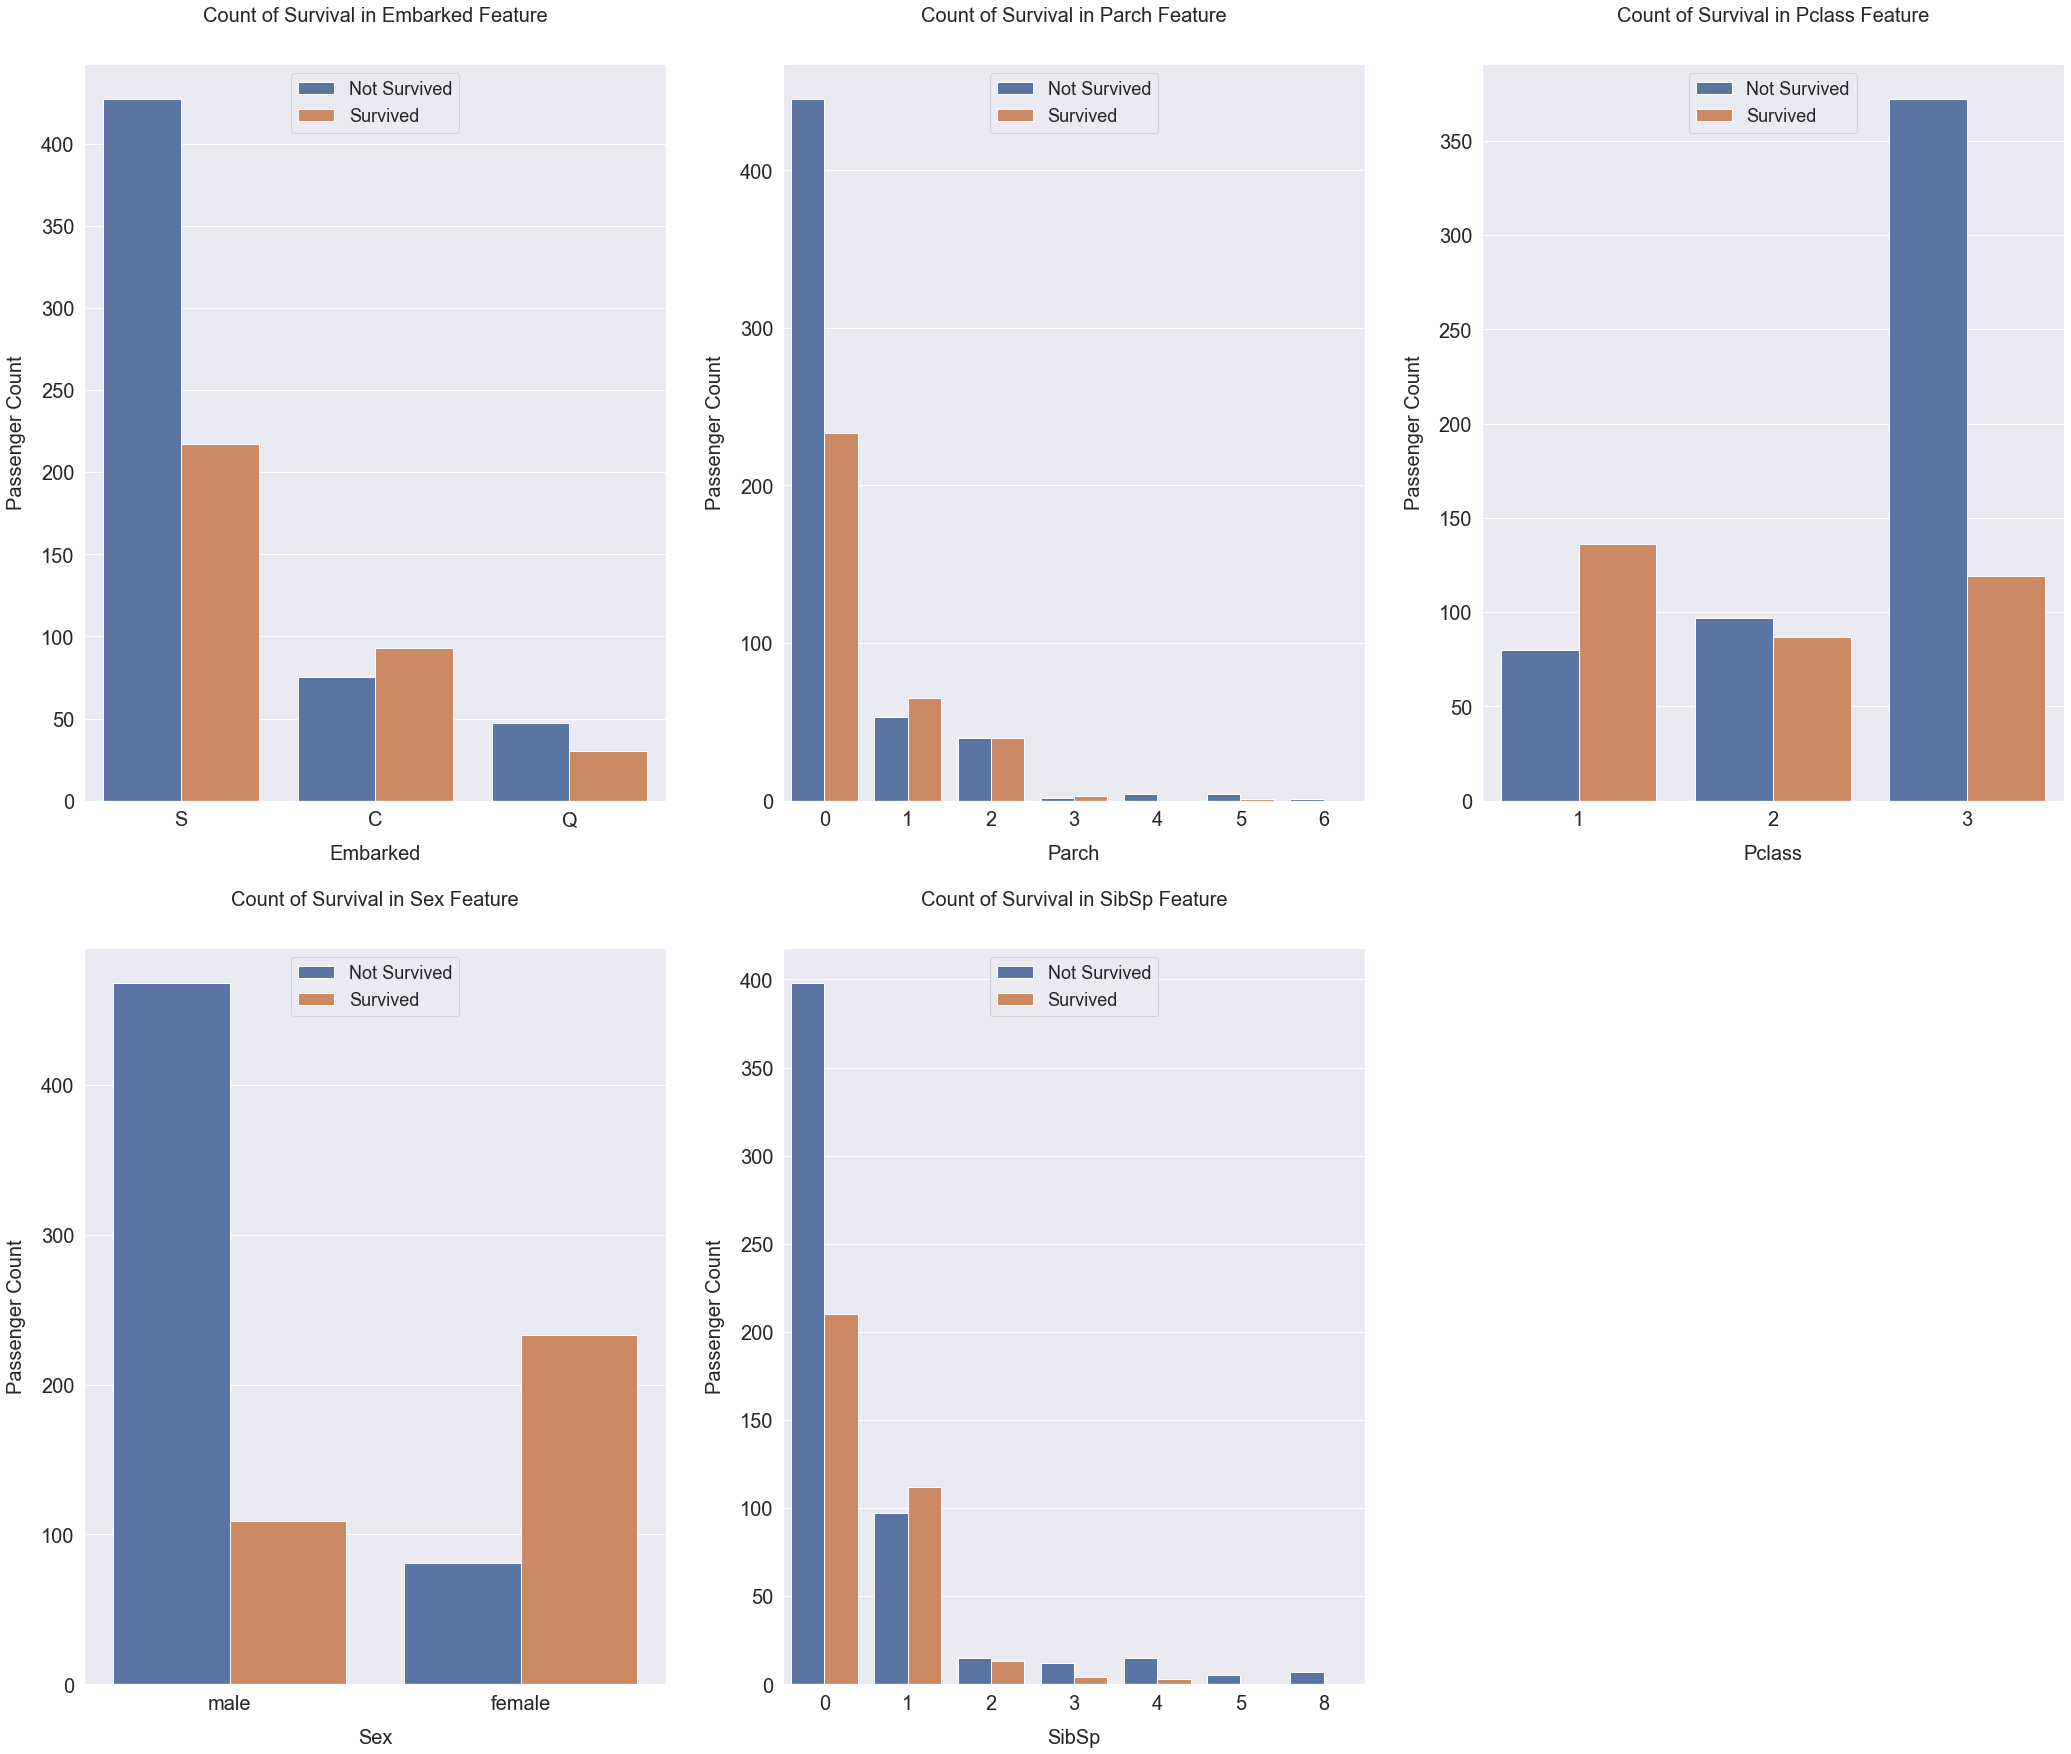

In [179]:
import matplotlib.pyplot as plt

cat_features = ['Embarked','Parch','Pclass','Sex','SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)
    
plt.show()    


### kesimpulan

Dari plot yang dihasilkan, kita dapat melihat ternyata:
1. Lebih banyak penumpang yang berangkat dari Cherbourg selamat, sementara penumpang dari Southampton, hanya setengah yang selamat.
2. Untuk orang yang hanya membawa 1 Orang Tua/Anak, lebih banyak yang selamat
3. Untuk penumpang dengan Kelas Penumpang 1, peluang untuk bertahan hidup jauh lebih tinggi dan untuk penumpang dengan Penumpang Kelas 3, hanya sedikit yang selamat.
4. Orang yang membawa 1 Saudara/Pasangan jauh lebih mungkin untuk bertahan hidup. Orang yang membawa 2 Saudara/Suami kemungkinan bertahan hidup cukup kecil.

Membuat dua plot untuk data numerik

#### Plot Pertama
Plot pertama adalah histogram yang menunjukkan jumlah penumpang yang selamat dan tidak selamat berdasarkan Tarif. 
kemudian menggabungkan data numerik menjadi 13 kelompok. Tarif termurah adalah 0 dan yang paling mahal adalah 512 (lihat statistik deskriptif). 
Jadi saya pikir membagi dengan 13 kelompok kuantil sudah cukup. Kode perintah di bawah ini bermaksud untuk membagi tarif menjadi 13 bagian dengan fungsi qcut().

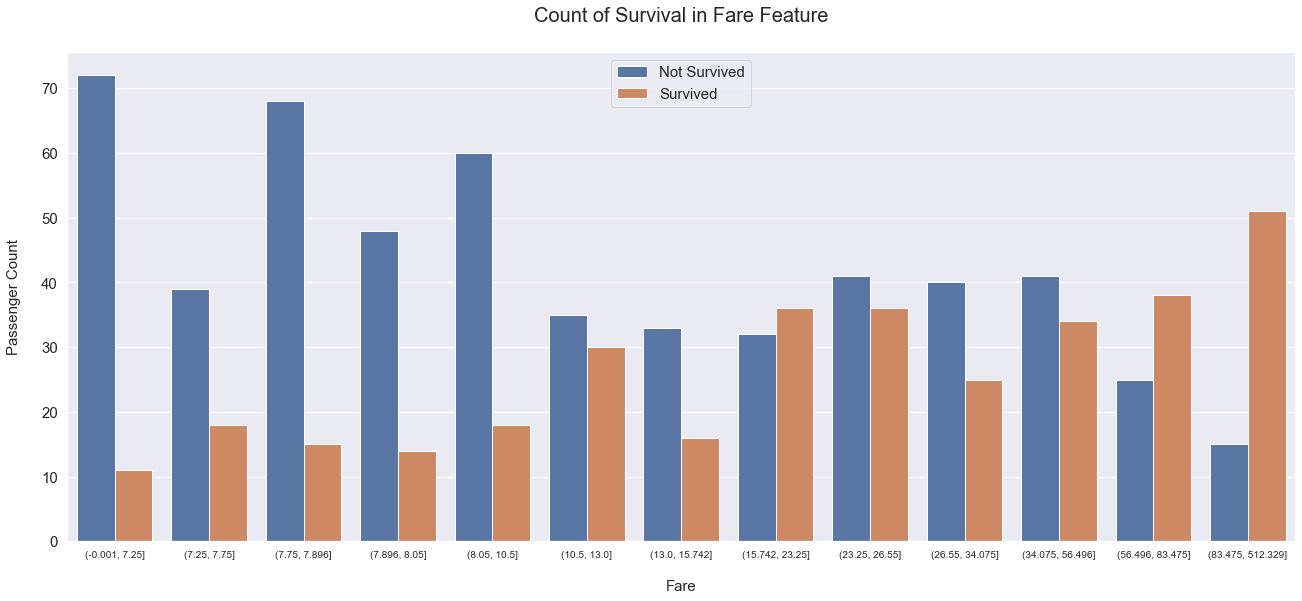

In [180]:
import matplotlib.pyplot as plt

df_all['Fare'] = pd.qcut(df_all['Fare'], 13)


fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

   
plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=20, y=1.05)
    
plt.show()    

In [181]:
df_all['Fare'].head(13)

0       (-0.001, 7.25]
1     (56.496, 83.475]
2        (7.896, 8.05]
3     (34.075, 56.496]
4        (7.896, 8.05]
5         (8.05, 10.5]
6     (34.075, 56.496]
7      (15.742, 23.25]
8         (10.5, 13.0]
9      (26.55, 34.075]
10     (15.742, 23.25]
11      (23.25, 26.55]
12       (7.896, 8.05]
Name: Fare, dtype: category
Categories (13, interval[float64, right]): [(-0.001, 7.25] < (7.25, 7.75] < (7.75, 7.896] < (7.896, 8.05] ... (26.55, 34.075] < (34.075, 56.496] < (56.496, 83.475] < (83.475, 512.329]]

Dapat dilihat pada grafik bahwa semakin mahal tiketnya, semakin besar kemungkinan orang tersebut bertahan hidup, mulai dari usia 56 tahun ke atas. Namun jumlah survivor mulai dari 10,5 telah meningkat pesat, kecuali insiden yang menimpa rombongan pemegang tiket seharga 13-15,742.

Plot kedua adalah histogram yang menggambarkan jumlah penumpang yang selamat dan tidak selamat berdasarkan Umurnya.
Saya juga menggabungkan data numerik ke dalam 13 Kelompok. Kita tahu bahwa usia minimum adalah 0,17 tahun dan yang tertua adalah 80 tahun. Jadi saya pikir membaginya dengan 13 kelompok kuantil sudah cukup. kode perintah di bawah ini adalah untuk memplot plot kelompok umur terhadap tingkat keamanan.

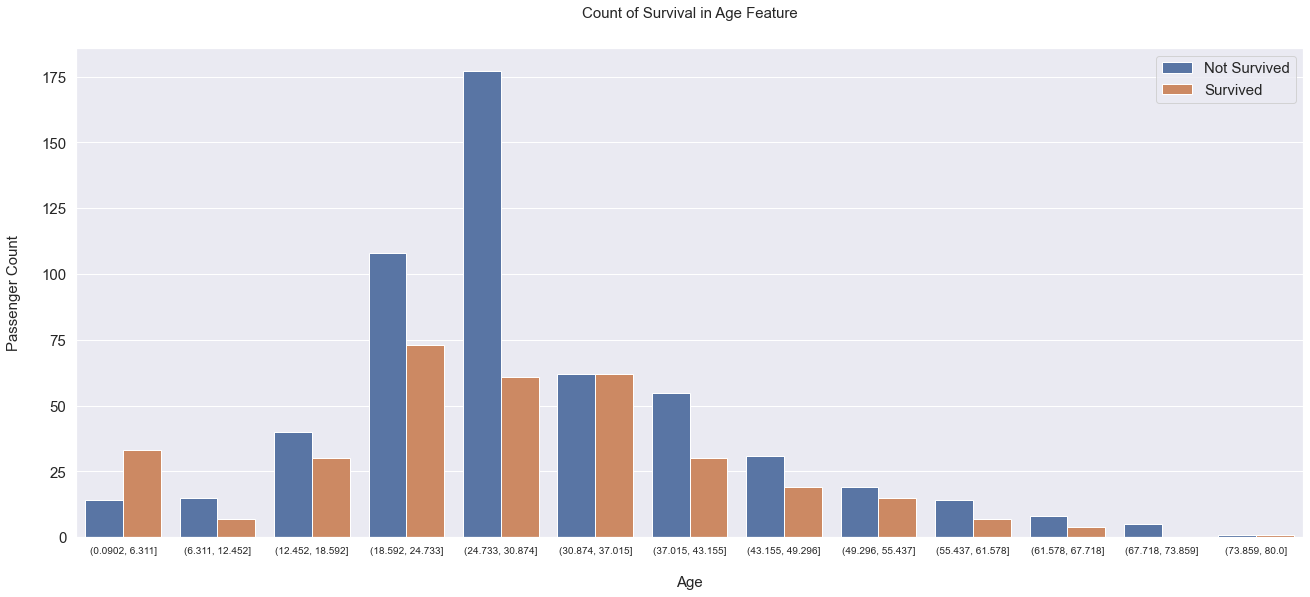

In [182]:
df_all['Age'] = pd.cut(df_all['Age'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

In [183]:
df_all['Fare'].head(13)

0       (-0.001, 7.25]
1     (56.496, 83.475]
2        (7.896, 8.05]
3     (34.075, 56.496]
4        (7.896, 8.05]
5         (8.05, 10.5]
6     (34.075, 56.496]
7      (15.742, 23.25]
8         (10.5, 13.0]
9      (26.55, 34.075]
10     (15.742, 23.25]
11      (23.25, 26.55]
12       (7.896, 8.05]
Name: Fare, dtype: category
Categories (13, interval[float64, right]): [(-0.001, 7.25] < (7.25, 7.75] < (7.75, 7.896] < (7.896, 8.05] ... (26.55, 34.075] < (34.075, 56.496] < (56.496, 83.475] < (83.475, 512.329]]

#### kesimpulan
Berdasarkan grafik terlihat bahwa penumpang pada kelompok usia yang lebih muda cenderung kurang aman dibandingkan dengan anak-anak dan orang tua. Kelompok usia penumpang didominasi oleh kelompok usia muda, yaitu antara usia 18–24, 24-30, dan 30–37 tahun.

#### Catatan

Untuk pembagian jumlah kategori yang berbeda baik itu 13 kelompok untuk Age maupun 13 kelompok untuk Tarif bukanlah nilai standar pengelompokan. Namun adalah visualisasi berdasarkan pembagian dan sebaran datanya.

Misalnya untuk Age yang memiliki range data 0 (min) sampai 80 (max). Untuk itu, awalnya membagi data menjadi 8 kelompok, misalkan saja sudah cukup untuk merepresentasikan sebaran data. Ketika setelah diperiksa dengan visualisasi distribusinya tidak representatif dan miring. Selanjutnya kita dapat menambah/mengurangi jumlah kelompok untuk melihat sebaran data berikut. Untuk “Usia” ini dipilih 13 kelompok yang sesuai untuk mewakili distribusi data. Dengan cara yang sama, bisa juga diterapkan pada Tarif.

Sehingga tidak ada aturan baku yang mengatur pengelompokan sebaran data.

### Feature

Rekayasa Fitur adalah tentang membuat fitur baru dari fitur yang ada.

Dari sini kita akan membuat beberapa fitur baru yang bertujuan untuk meningkatkan akurasi model pembelajaran mesin kita.

Fitur pertama yang kita buat adalah Family_Size, sesuai dengan namanya merupakan gabungan dari Parent, Children, Sibling, dan Spouse. Kemudian kita tambahkan 1 dengan asumsi menghitung diri mereka sebagai orang itu juga.

Fitur kedua yang kami buat adalah menggabungkan Family_Size dengan grupnya masing-masing tergantung jumlahnya.

Kategorinya adalah sebagai berikut.

    Family Size 1 = Alone

    Family Size 2, 3, and 4 = Small

    Family Size 5 and 6 = Medium

    Family Size 7, 8 and 11 = Large

After that, we draw the plot.

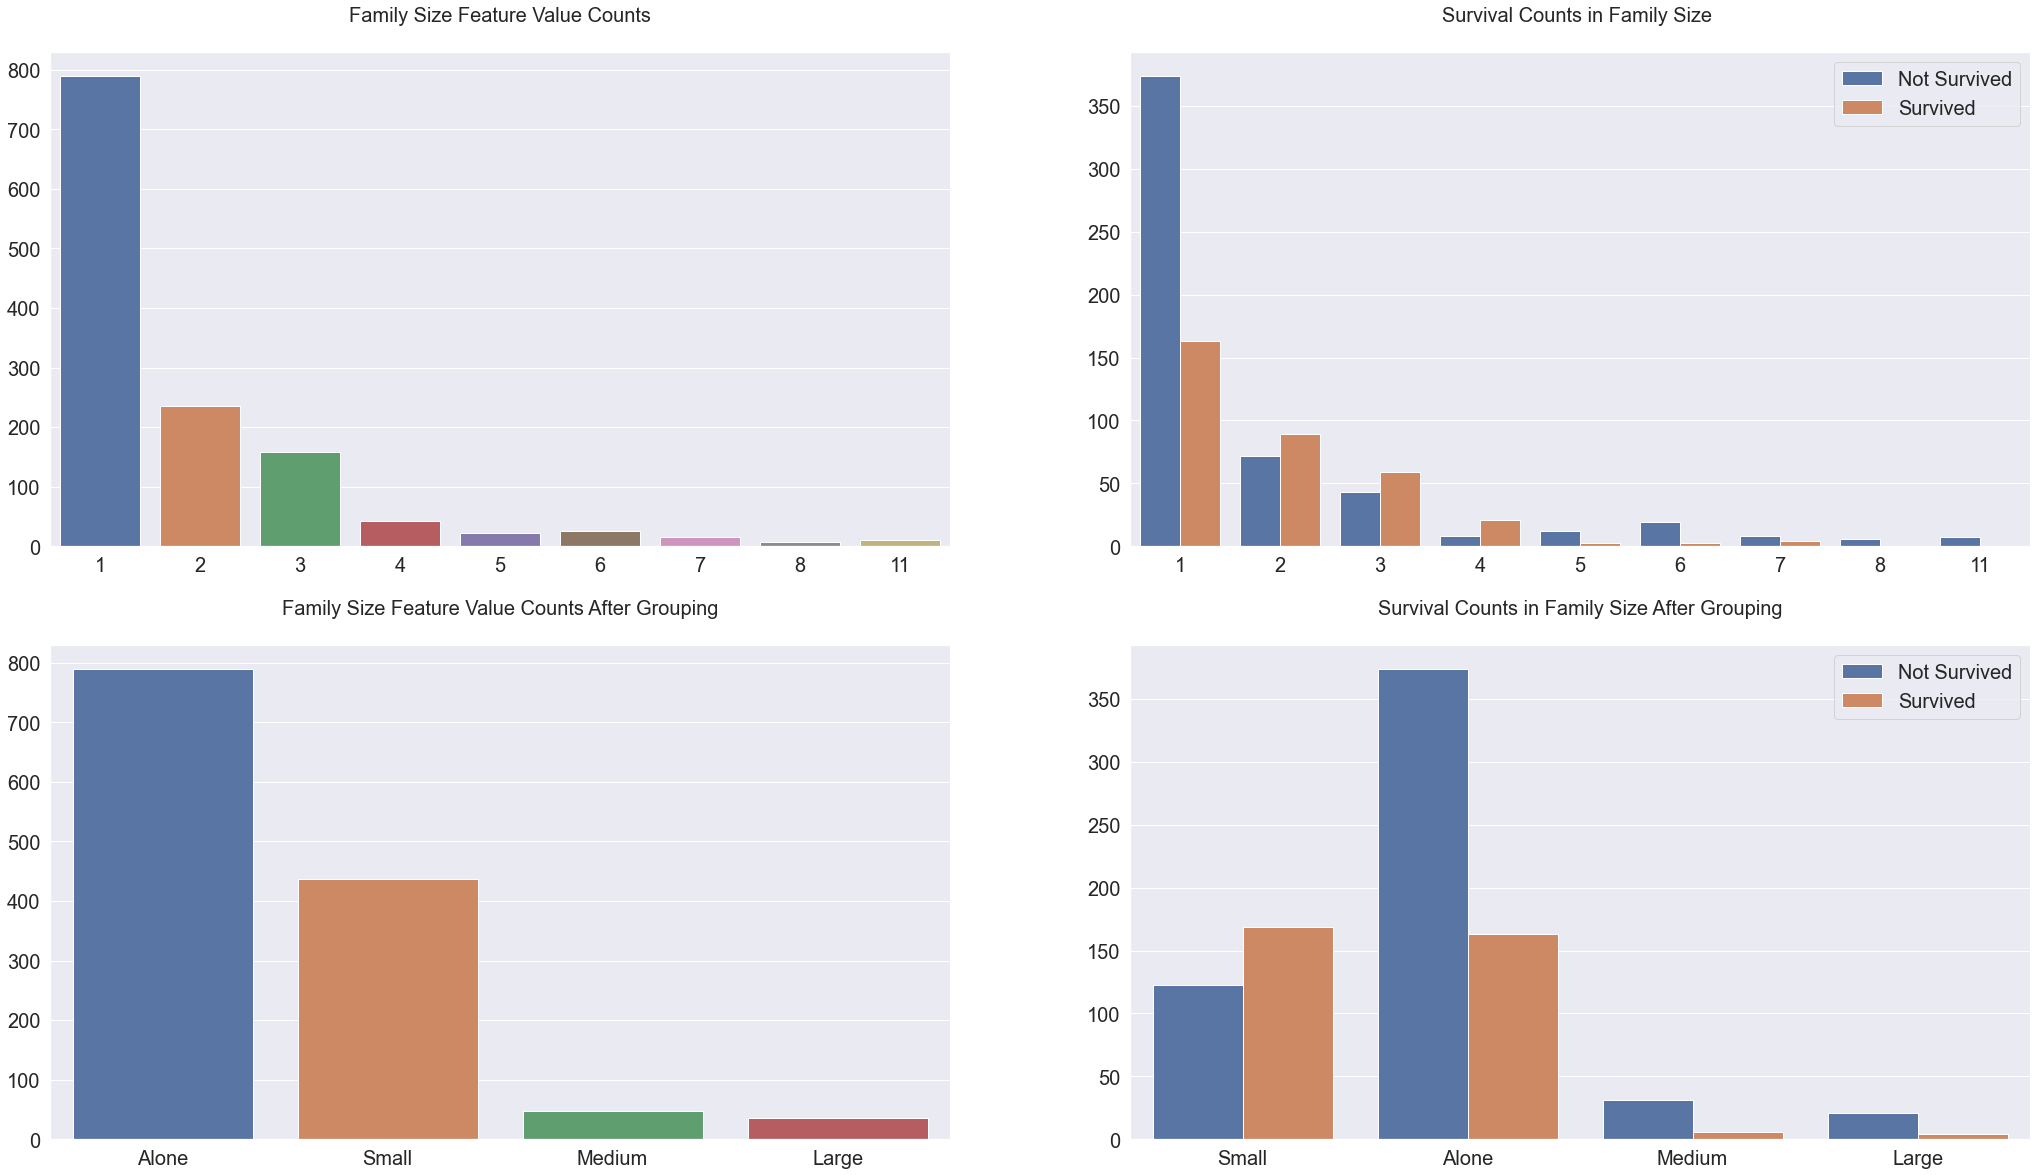

In [184]:
import matplotlib.pyplot as plt
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

### kseimpulan
Plot menjelaskan bahwa orang-orang dengan Family_Size 2,3,4 memiliki peluang lebih besar untuk bertahan hidup, kemungkinan sisanya menurun, dan orang-orang yang menggunakan Family_Size_Grouped Small lebih mungkin memiliki tingkat keamanan yang lebih besar.

Kita membuat fitur baru yang disebut Ticket_Frequency dengan nilai gabungan dari Tiket yang sama. Contoh sebelumnya akan bernilai 6 karena ada 6 tiket yang sama dalam data kita. Mengapa fitur ini berbeda dari Family_Size_Grouped? Karena bisa jadi ada pembantu, teman yang menggunakan tiket yang sama tapi tidak dihitung sebagai keluarga.

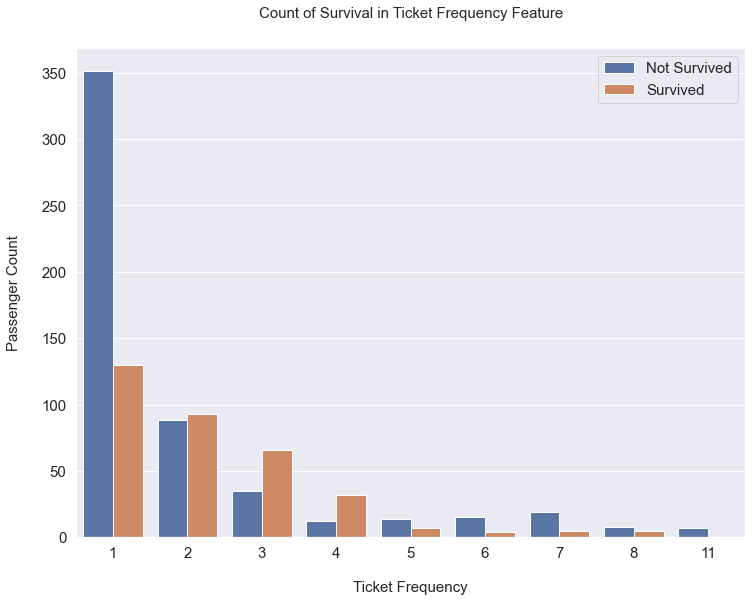

In [185]:
import matplotlib.pyplot as plt
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

### kesimppulan
Pada hasil plot, penjelasannya adalah fitur Family_Size_Grouped, pada angka 2, 3, dan 4 kemungkinan untuk bertahan hidup meningkat.

In [186]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency
0,"(18.592, 24.733]",Unknown,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1
1,"(37.015, 43.155]",C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2
2,"(24.733, 30.874]",Unknown,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1
3,"(30.874, 37.015]",C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2
4,"(30.874, 37.015]",Unknown,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1


Jika dilihat pada kolom Name, dari nama-nama orang yang ada di dataset ini semuanya memiliki pola yang sama

[Last Name], [Title]. [First Name]

jadi kita bisa mengambil posisi mereka dengan mengambil kata setelah ,(koma) dan sebelum . (titik). Fungsi .split() akan membagi kalimat menjadi beberapa kata dengan kata kunci tertentu dan dapat diambil dalam indeks[].

Dari sini kita bisa membuat fitur baru dengan nama Title yang berisi tentang posisi seseorang. Sebutan yang paling umum di sini adalah Tuan, Nyonya, dan Nona sehingga kita dapat mengetahui status perkawinan seseorang dari Ny.

Kita bisa membuat fitur baru lagi, seperti Is_Married. Ciri ini adalah jika seseorang memiliki posisi 'Mrs', itu berarti dia sudah menikah.

In [187]:
df_all['Title'] = df_all['Name'].str.split(', ', n = 1, expand = True)[1].str.split('.', n = 1, expand = True)[0]

print(df_all['Title'].unique())

df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


C:\Users\Lawencon\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Setelah melakukan df_all['Title'].unique() ternyata masih banyak judul lainnya, dan kita kelompokkan di konten selanjutnya

1. ['Miss','Mrs','Ms','Mlle','Lady','Mme','the Countess','Dona']will be changed to ‘Miss/Mrs/Ms’
2. ['Dr','Col','Major','Jonkheer','Capt','Sir','Don','Rev'] becomes ‘Dr/Military/Noble/Clergy’

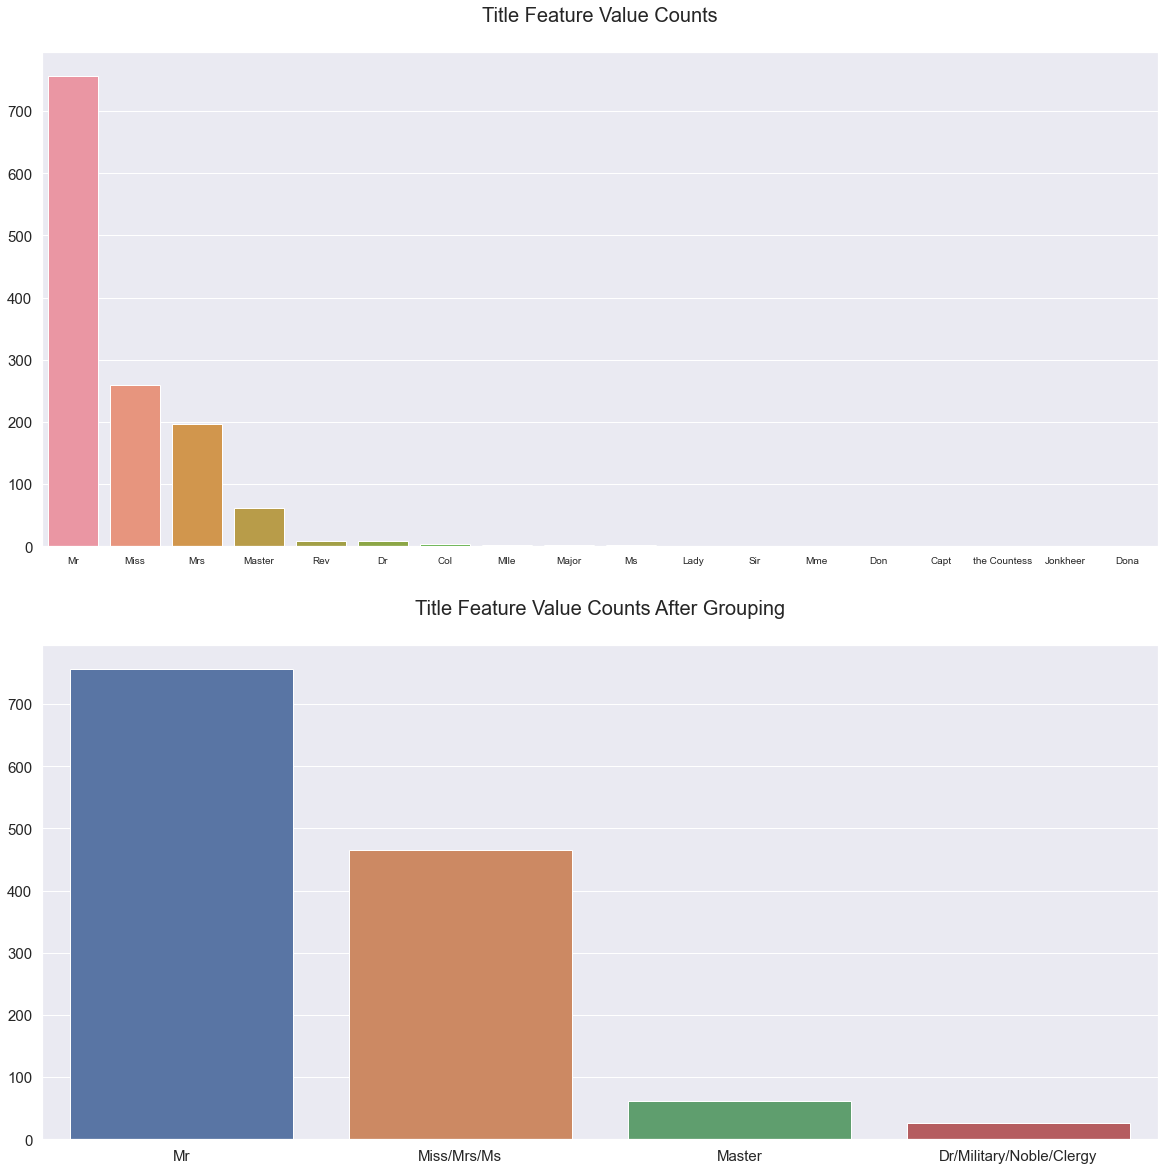

In [188]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

### Modeling

#### Training Set & Test Set
Tahap pertama sebelum melatih model adalah menentukan train set dan test set pada dataset.

In [189]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]


#### Encoding
Encoding adalah proses mengubah data kategorikal menjadi data numerik. Hal ini perlu dilakukan karena model pelatihan hanya mengenali data numerik. Proses encoding dapat dilakukan dengan menggunakan LabelEncoder() atau OneHotEncoder().

LabelEncoder() lebih cocok diterapkan pada data kategorikal yang memiliki dua nilai, yang akan direpresentasikan sebagai nilai 1 atau 0 setelah proses encoding. Dalam kode berikut, saya menerapkan loop bersarang. Loop pertama berarti untuk setiap df_train dan df_test pada variabel dfs. Diikuti oleh loop kedua yang berarti untuk setiap kolom dalam variabel non_numeric_features direpresentasikan sebagai fitur. Dalam loop bersarang, saya melakukan Encoding dengan menerapkan LabelEncoder() ke bingkai data fitur. Lebih jelasnya dapat dilihat pada kode berikut:

In [190]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

C:\Users\Lawencon\AppData\Local\Temp/ipykernel_5972/1506503538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = LabelEncoder().fit_transform(df[feature])


Sedangkan OneHotEncoder() adalah proses encoding yang akan membuat kolom baru berdasarkan jumlah data unik dari kolom kategoris. Nilai yang dihasilkan adalah boolean di mana hanya 1 yang Benar atau 0 Salah. Cocok untuk data kategorikal yang memiliki nilai kategoris lebih dari dua.

In [191]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

In [192]:
df_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
0,3,Unknown,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,6,C85,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4,Unknown,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,5,C123,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,Unknown,2,3,"Allen, Mr. William Henry",0,5,3,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [193]:
df_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
891,5,Unknown,1,2,"Kelly, Mr. James",0,892,3,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
892,7,Unknown,2,0,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
893,10,Unknown,1,4,"Myles, Mr. Thomas Francis",0,894,2,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
894,4,Unknown,2,4,"Wirz, Mr. Albert",0,895,3,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
895,3,Unknown,2,5,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Drop Unnecessary columns

Selanjutnya, kita menghapus kolom yang tidak digunakan sebagai fitur. Kolom yang akan dihapus didefinisikan dalam variabel drop_cols berikut:

In [194]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']

df_all.drop(columns=drop_cols, inplace=True)

### Normalization

Standardisasi adalah proses pengubahan nilai-nilai suatu fitur sehingga nilai-nilai tersebut memiliki skala yang sama. Untuk menstandarisasi, Anda dapat menggunakan StandardScaler().

In [195]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 22)
y_train shape: (891,)
X_test shape: (418, 22)


### Model Training Using Random Forest Algorithm
Algoritma yang saya gunakan untuk pelatihan model adalah Random Forest yang cocok untuk diterapkan pada kasus klasifikasi biner. Kemudian, algoritma Random Forest diterapkan ke X_train dan y_train dengan menggunakan fungsi fit().

In [196]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, oob_score=True, random_state=50)

Dengan mengimpor dan menerapkan cross_val_score, saya dapat mengetahui berapa skor akurasi yang diperoleh selama proses pelatihan dengan Random Forest. Rata-rata skor akurasi yang diperoleh adalah 0,83 dengan standar deviasi 0,037.

In [198]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.87640449 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.87640449 0.85393258]
Mean: 0.8338951310861423
Standard Deviation: 0.03719055862675359


### Model Prediction

#### Classification Report
Untuk memeriksa bagaimana kinerja model telah dibuat, Anda dapat menerapkan classification_report dan confusion_matrix untuk menentukan tingkat akurasi yang diprediksi model.


Variabel y_train_predis dihasilkan menggunakan algoritma random_forest yang memprediksi X_train dengan fungsi prediksi. Kemudian, bandingkan y_train_pred dengan y_train dengan klasifikasi_report yang akan menunjukkan berapa nilai akurasinya.

In [199]:
from sklearn.metrics import classification_report
y_train_pred = random_forest.predict(X_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       549
         1.0       0.82      0.74      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.84      0.84      0.83       891



In [200]:
from sklearn.metrics import confusion_matrix, classification_report

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Not Survived', 'Survived'), ('Not Survived', 'Survived'))

confusion_matrix_df

,Not Survived,Survived
Not Survived,492,57
Survived,89,253


#### Confusion Matrix

membuat confusion matrix di plot heatmap. Perintah kode pertama membuat kerangka data confusion matrix yang menjalankan fungsi confusion_matrix pada y_train dan y_train_pred kemudian mengubahnya menjadi DataFrame. Kolom dan indeks diubah dengan mengubah keduanya menjadi ''Not Survived'' dan 'Survived' . Perintah kode kedua adalah perintah kode untuk memvisualisasikan confusion matrix dataframe kedalam heatmap.

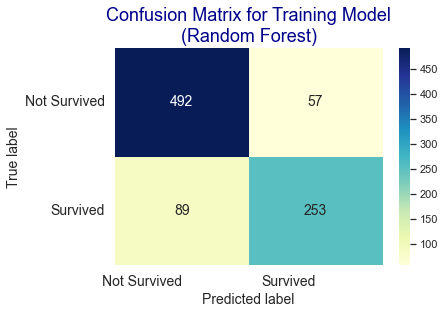

In [202]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Total sampel pada y_train dan y_train_pred adalah 891 penumpang. 
Hasil dari matriks konfusi dapat dijelaskan sebagai berikut:
1. Ada 492 penumpang atau 55,2% yang pada labelnya sebenarnya adalah penumpang yang tidak selamat dan diprediksi secara akurat sebagai penumpang yang tidak selamat.

2. Terdapat 57 penumpang atau 6,39% yang pada label tersebut sebenarnya adalah penumpang yang tidak selamat namun diprediksi selamat.
3. Terdapat 89 penumpang atau 9,98% yang pada label tersebut sebenarnya merupakan penumpang yang selamat namun diprediksi merupakan penumpang yang tidak selamat.
4. Terdapat 253 penumpang atau 28,39% yang pada label tersebut sebenarnya merupakan penumpang yang selamat dan diprediksi secara akurat sebagai penumpang yang selamat.

In [204]:
#create y_test prediction with the model
y_test_pred = random_forest.predict(X_test)
#print(y_test_pred)
fill = pd.DataFrame(index = df_test.index[df_test.isnull().any(axis = 1)], data = y_test_pred, columns = ['Survived'])
df_test = df_test.fillna(fill)

#### Plotting  into diagram 

memplot df_test ke dalam diagram lingkaran untuk menggambarkan persentase hasil prediksi untuk penumpang yang selamat dan tidak selamat. Pertama-tama, saya mengelompokkan 'PassengerId' terlebih dahulu berdasarkan kolom 'Survived' dengan menggunakan group_by yang disimpan dalam variabel data. Setelah itu, saya memplot data variabel ke dalam diagram lingkaran.

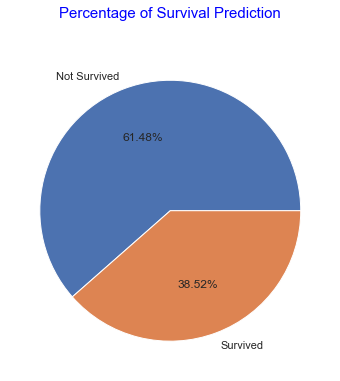

In [205]:
import matplotlib.pyplot as plt
data = df_test.groupby('Survived')['PassengerId'].count().reset_index()
plt.figure(figsize=(6,6))
plt.pie(data['PassengerId'], labels = ['Not Survived','Survived'],autopct='%1.2f%%')
plt.title('Percentage of Survival Prediction',loc='center', pad=30, fontsize=15, color='blue')
plt.show()

Berdasarkan pie chart di atas, terdapat 61,48% penumpang yang diprediksi tidak akan selamat dan ada 38,52% penumpang yang diprediksi akan selamat.